Mrinmayee Gokhale 
RollNo 10
PRN: 1032232136
ML Lab Assg 01


Naive Bayes and KNN

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- KNN Classifier ----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# ---- Naive Bayes Classifier ----
nb = GaussianNB()
nb.fit(X_train, y_train)  # Naive Bayes does not require scaling
y_pred_nb = nb.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall   :", round(recall_score(y_true, y_pred), 3))
    print("F1 Score :", round(f1_score(y_true, y_pred), 3))

# Compare models
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Naive Bayes", y_test, y_pred_nb)



Model: KNN
Accuracy : 0.695
Precision: 0.583
Recall   : 0.509
F1 Score : 0.544

Model: Naive Bayes
Accuracy : 0.766
Precision: 0.661
Recall   : 0.709
F1 Score : 0.684


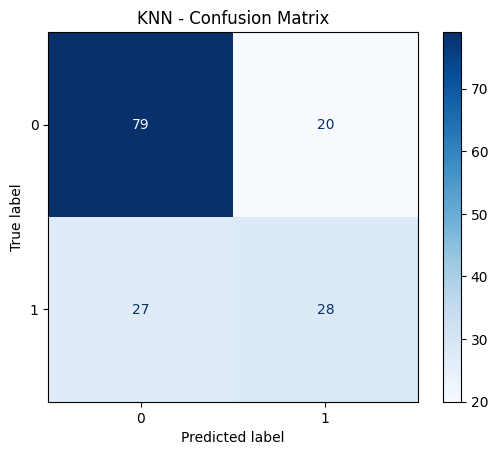

In [14]:
# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()

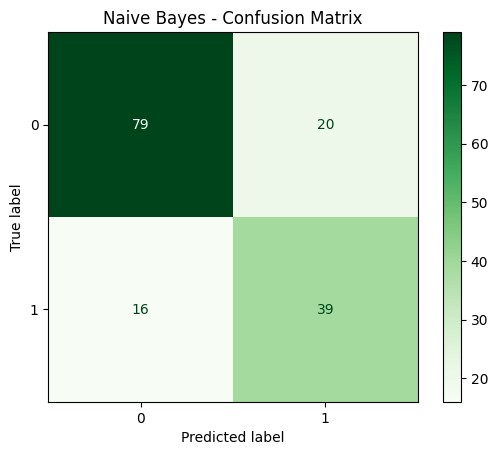

In [15]:
# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp_nb.plot(cmap='Greens')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


In [ ]:
'''Evaluation Metric Comparison
Metric	    KNN	  Naive Bayes	Better Model
Accuracy	0.695	0.766	    Naive Bayes
Precision	0.583	0.661	    Naive Bayes
Recall	    0.509	0.709	    Naive Bayes
F1 Score	0.544	0.684	    Naive Bayes

Interpretation:
Naive Bayes performs better across all metrics.

It detects more positive cases (higher recall) and balances them with good precision.

KNN has lower performance likely due to sensitivity to scaling, outliers, or high-dimensionality in this dataset.

Conclusion:
Naive Bayes is more suitable for this dataset classification task than KNN based on accuracy, precision, recall, and F1 score.'''

'Evaluation Metric Comparison\nMetric\tKNN\tNaive Bayes\tBetter Model\nAccuracy\t0.695\t0.766\tNaive Bayes\nPrecision\t0.583\t0.661\tNaive Bayes\nRecall\t0.509\t0.709\tNaive Bayes\nF1 Score\t0.544\t0.684\tNaive Bayes\n\nInterpretation:\nNaive Bayes performs better across all metrics.\n\nIt detects more positive cases (higher recall) and balances them with good precision.\n\nKNN has lower performance likely due to sensitivity to scaling, outliers, or high-dimensionality in this dataset.\n\nConclusion:\nNaive Bayes is more suitable for this classification task than KNN based on accuracy, precision, recall, and F1 score.'

In [ ]:

print(KNeighborsClassifier().get_params())
print(GaussianNB().get_params())
print(DecisionTreeClassifier().get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'priors': None, 'var_smoothing': 1e-09}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [10]:
from sklearn.svm import SVC
print(SVC().get_params())
from sklearn.linear_model import LogisticRegression
print(LogisticRegression().get_params())
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier().get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Accuracy = (TP + TN) / (TP + TN + FP + FN) #/total  

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

Specificity = TN / (TN + FP)

Bayes Theorem:
P(A|B) = [P(B|A) * P(A)] / P(B)
In Naive Bayes classifiers, Bayes' theorem is used to calculate the posterior probability of a class label given the observed features. The formula is: P(class | features) = (P(features | class) * P(class)) / P(features). Here, P(class | features) is the posterior probability, P(features | class) is the likelihood, and P(class) is the prior probability. P(features) is a normalizing constant